## GOAL-To automate the process of estimating price of the used car

### The dataset used is of Cars24 which consists of features of the cars and the price at which the cars were sold.

### Tools used - Used Machine learning linear regression model to predict the price of old car using the dataset to train the model. 

### Libraries-

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Importing dataset

In [2]:
!pip install gdown

In [8]:
import gdown

file_id = '15tIjPrstV2RnOMv2VSIKW7yW_M3KjyNa'

In [9]:
gdown.download(f'https://drive.google.com/uc?id={file_id}')

Downloading...
From: https://drive.google.com/uc?id=15tIjPrstV2RnOMv2VSIKW7yW_M3KjyNa
To: C:\Users\Lenovo\Documents\Untitled Folder\for_practice\cars24-car-price.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.79M/1.79M [00:00<00:00, 2.75MB/s]


'cars24-car-price.csv'

In [10]:
df = pd.read_csv("cars24-car-price.csv")

## Exploratory Data Analysis (EDA)

In [11]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


Insight-Variable full_name contains both Maker and Model information - need to extract make and model from full_name.

In [12]:
df.shape

(19980, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [14]:
display(df.describe())

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


Insights- <br>
1.selling_price ranges from [0.25, 395] - the values seem to be in lakhs. <br>
        2.mileage min is 0, max is 120 - need to check for outliers. <br>
3.engine min is 0, max is 6752 - values appear to be in "cc" - need to check for outliers.

## Distributions

<AxesSubplot:>

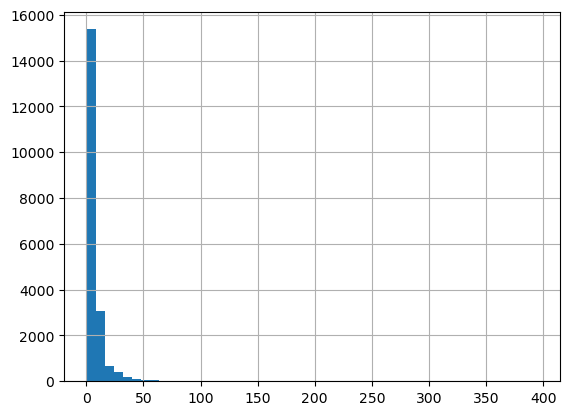

In [16]:
df['selling_price'].hist(bins=50)

In [17]:
(df.loc[df.selling_price > 100].shape[0] / df.shape[0]) * 100

0.055055055055055056

 percntage of outliers. We are manually taking a call that price over a 100 (K) is an outlier by looking at the above plot

In [19]:
df.loc[df.selling_price > 100, 'selling_price'] = 100

saturated selling price at 100

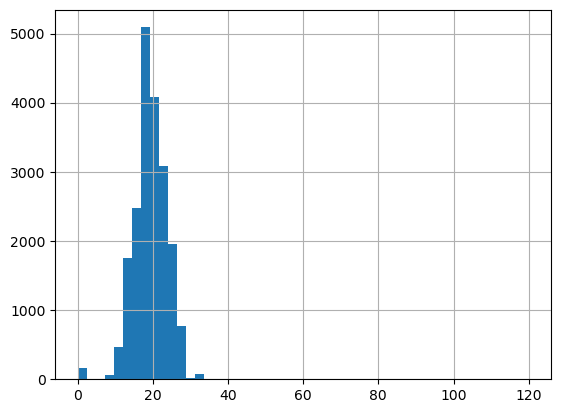

In [21]:
df["mileage"].hist(bins=50);

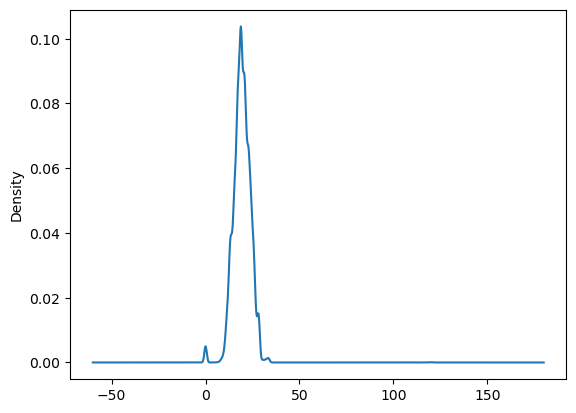

In [22]:
df["mileage"].plot.density();

In [23]:
df[df["mileage"]<=5].mileage.describe()

count    161.000000
mean       0.024845
std        0.315244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: mileage, dtype: float64

In [24]:
df.loc[df.mileage == 0].shape[0] / df.shape[0] # 0.8 %

0.008008008008008008

In [25]:
df[df["mileage"] == 0.0].shape

(160, 11)

In [26]:
df[df["mileage"] > 40].mileage.describe()

count      4.0
mean     117.5
std        5.0
min      110.0
25%      117.5
50%      120.0
75%      120.0
max      120.0
Name: mileage, dtype: float64

In [27]:
df[df["mileage"] > 40]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
11966,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0
15684,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
17782,Mahindra e2o T2,4.50,2015.0,Dealer,40000,Electric,Automatic,120.0,0.000000,25.5,5.0
18401,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0


In [28]:
df[df["mileage"] > 40].fuel_type.value_counts()

Electric    4
Name: fuel_type, dtype: int64

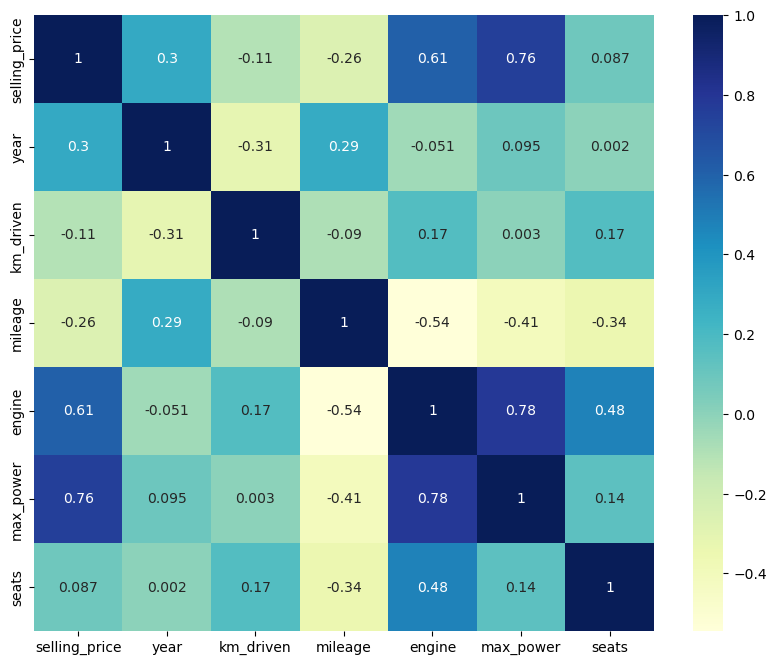

In [31]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

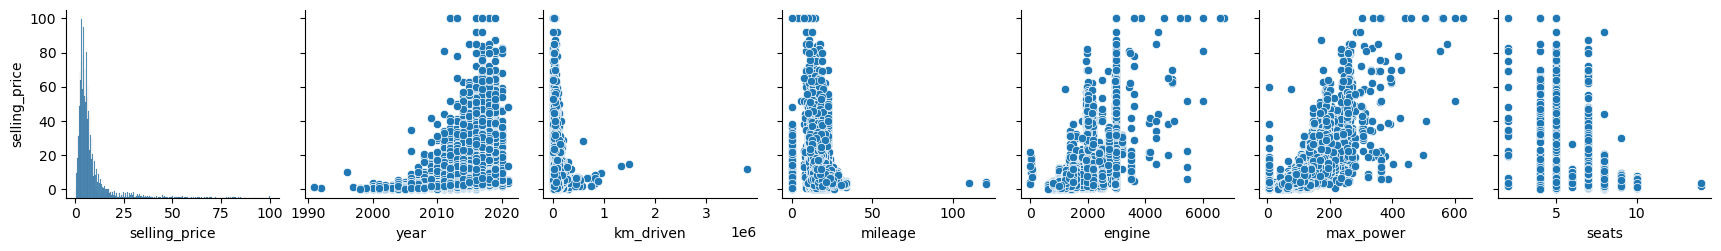

In [32]:
sns.pairplot(df, y_vars=["selling_price"]);

In [34]:
df['seats'].value_counts(normalize=True)

5.0     0.834885
7.0     0.118619
8.0     0.022022
4.0     0.011261
6.0     0.007157
9.0     0.003604
10.0    0.001301
2.0     0.001051
14.0    0.000100
Name: seats, dtype: float64

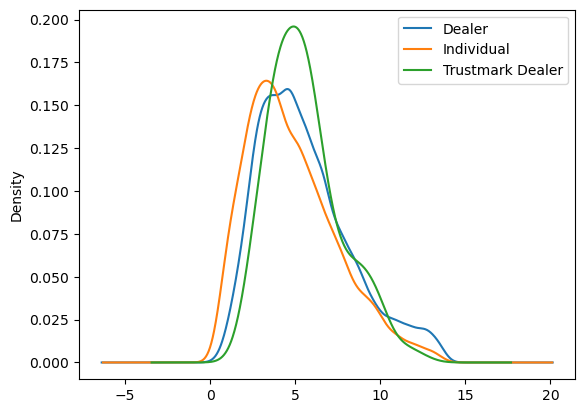

In [35]:
df.loc[df.selling_price<=df.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density();
plt.legend();

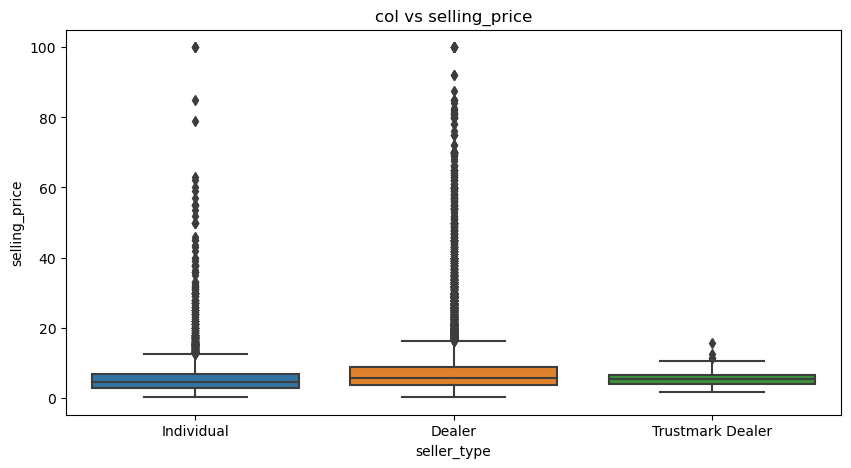

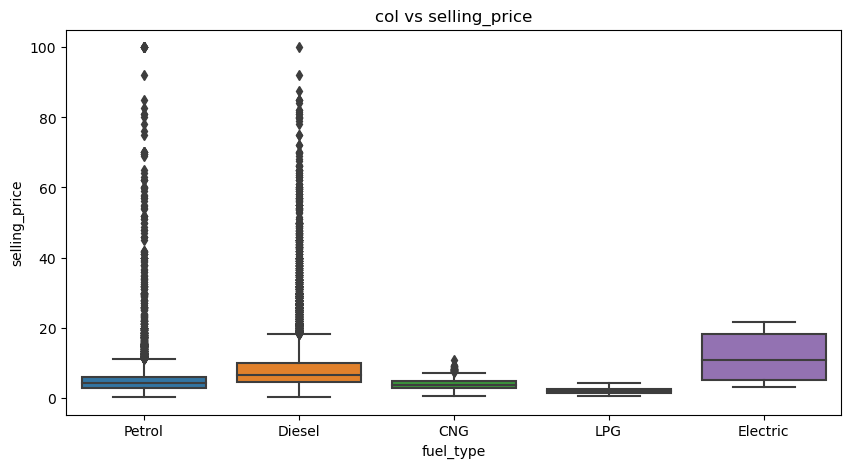

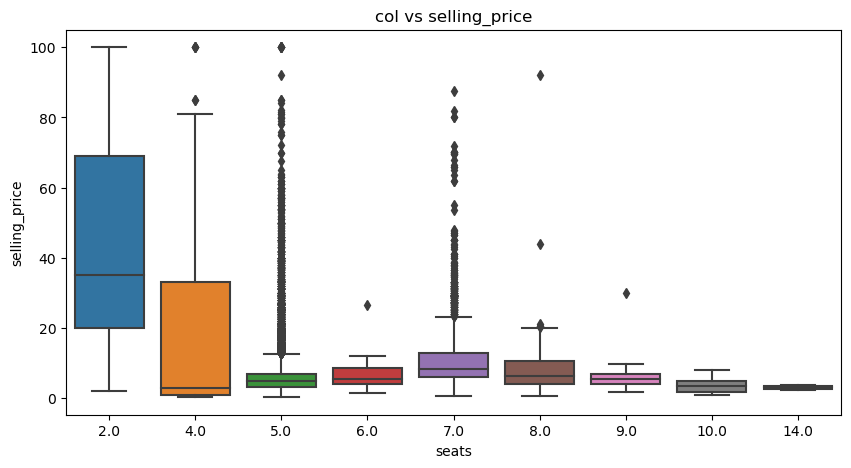

In [36]:
for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='selling_price',x=col, data=df)
    plt.title('col vs selling_price')
    plt.show()

## Preprocessing

In [41]:
file_id = '1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR'

In [42]:
gdown.download(f'https://drive.google.com/uc?id={file_id}')

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: C:\Users\Lenovo\Documents\Untitled Folder\for_practice\cars24-car-price-cleaned.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.69M/1.69M [00:00<00:00, 2.66MB/s]


'cars24-car-price-cleaned.csv'

In [46]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


### Target Variable Encoding

In [47]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [48]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Test/Train Split

In [51]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [59]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [60]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

In [70]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

## Linear Regression Model

In [62]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [63]:
model.coef_

array([ 7.24684877e+11, -2.50524041e-01, -2.32162870e-01,  7.40255386e-02,
        4.69033520e-02,  7.24684877e+11,  6.61863862e-02,  8.59007350e-01,
       -7.15142083e-03, -7.01677048e-03,  6.94395193e-03,  1.32902163e-01,
        1.49814687e-02, -6.84055515e-03, -3.67921327e-03, -1.62455555e-02,
       -2.35314605e-02])

In [65]:
model.intercept_

-724684877475.6672

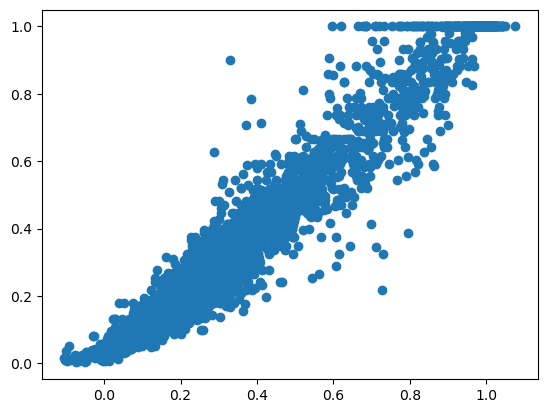

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.show()

In [119]:
model.coef_

array([ 7.24684877e+11, -2.50524041e-01, -2.32162870e-01,  7.40255386e-02,
        4.69033520e-02,  7.24684877e+11,  6.61863862e-02,  8.59007350e-01,
       -7.15142083e-03, -7.01677048e-03,  6.94395193e-03,  1.32902163e-01,
        1.49814687e-02, -6.84055515e-03, -3.67921327e-03, -1.62455555e-02,
       -2.35314605e-02])

In [120]:
model.intercept_

-724684877475.6672

In [68]:
model.score(X_train, y_train)

0.9459023680144298

In [69]:
model.score(X_test, y_test)

0.945995790025289